In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_titanic_dataset_path = kagglehub.dataset_download('yasserh/titanic-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.simplefilter("ignore")

In [ ]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(columns=['Cabin'],inplace=True)

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(891, 11)

In [ ]:
fig=px.bar(
           df['Pclass'].value_counts(),
           color=df['Pclass'].value_counts().index,
           template='plotly_dark',
           labels={'value':'count'},
           text_auto=True,
           title='The most reserved class'
          )
fig.show()

In [ ]:
value_sex=df['Sex'].value_counts().values
index_sex=df['Sex'].value_counts().index

In [ ]:
fig=px.pie(values=value_sex,title='The most gender was in titanic',names=index_sex,template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

In [ ]:
df['Age'].agg(['max','min','mean'])

,Age
max,80.000000
min,0.420000
mean,29.699118


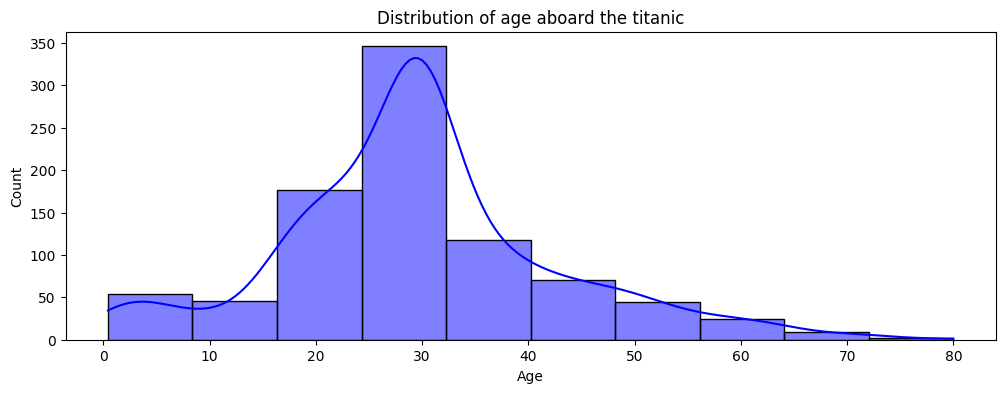

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Age'],bins=10,color='blue',kde=True)
plt.title('Distribution of age aboard the titanic')
plt.show()

In [ ]:
fig=px.bar(
           df['SibSp'].value_counts(),
           color=df['SibSp'].value_counts().index,
           template='plotly_dark',
           labels={'value':'count'},
           text_auto=True,
           title=''
          )
fig.show()
#Most of those aboard titanic did not have siblings.

In [ ]:
fig=px.bar(
           df['Parch'].value_counts(),
           color=df['Parch'].value_counts().index,
           template='plotly_dark',
           labels={'value':'count'},
           text_auto=True,
           title=''
          )
fig.show()
#Most of those aboard titanic did not have childern or parents.

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


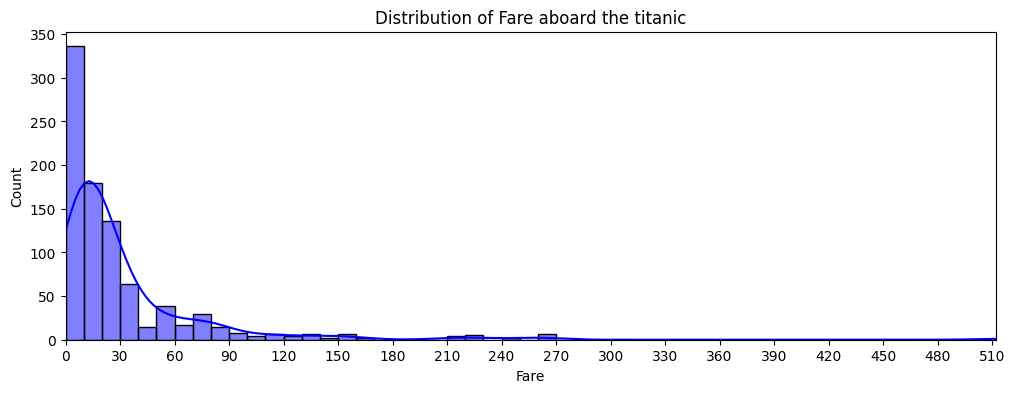

In [ ]:
bins = np.arange(0, 513, 10)
plt.figure(figsize=(12,4))
sns.histplot(df['Fare'],bins=bins,color='blue',kde=True)
plt.title('Distribution of Fare aboard the titanic')
plt.xlim(0,512)
plt.xticks(np.arange(0, 513, 30))
plt.show()

In [ ]:
values_embarked=df['Embarked'].value_counts()
index_embarked=df['Embarked'].value_counts().index
index_embarked = index_embarked.map({'S': "Southampton", 'Q': "Queenstown" , 'C': "Cherbourg"})
fig=px.bar(
           values_embarked,
           color=index_embarked,
           template='plotly_dark',
           labels={'value':'count'},
           text_auto=True,
           title=''
          )
fig.show()

In [ ]:
survived_people=df[df['Survived']==1]

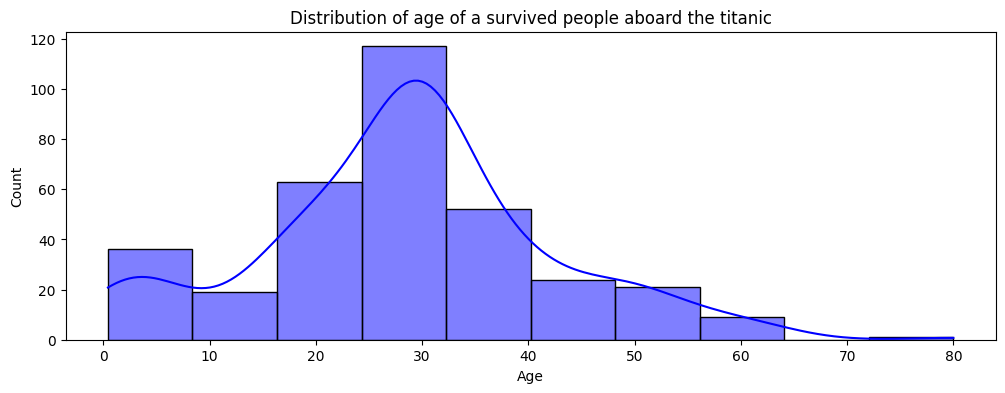

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(survived_people['Age'],bins=10,color='blue',kde=True)
plt.title('Distribution of age of a survived people aboard the titanic')
plt.show()

In [ ]:
value_sex_survive=survived_people['Sex'].value_counts().values
index_sex_survive=survived_people['Sex'].value_counts().index
fig=px.pie(values=value_sex_survive,
           title='The most gender survived aboard the titanic',
           names=index_sex_survive,template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

In [ ]:
values_embarked=survived_people['Embarked'].value_counts()
index_embarked=survived_people['Embarked'].value_counts().index
index_embarked = index_embarked.map({'S': "Southampton", 'Q': "Queenstown" , 'C': "Cherbourg"})
fig=px.bar(
           values_embarked,
           color=index_embarked,
           template='plotly_dark',
           labels={'value':'count'},
           text_auto=True,
           title='The most port of embarkation who has people survived'
          )
fig.show()

In [ ]:
values_class=survived_people['Pclass'].value_counts()
index_class=survived_people['Pclass'].value_counts().index
fig=px.bar(
           values_class,
           color=index_class,
           template='plotly_dark',
           labels={'value':'count'},
           text_auto=True,
           title='The most Class who has people survived'
          )
fig.show()

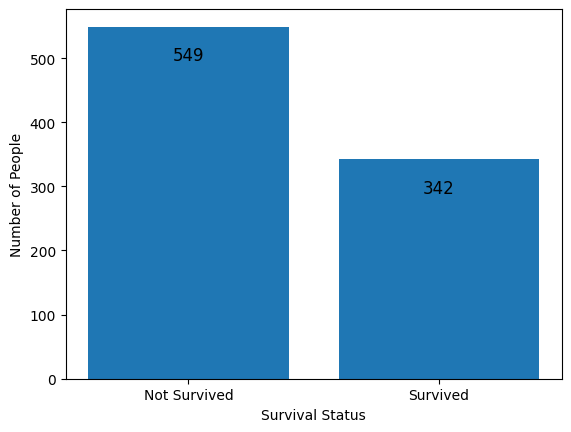

In [ ]:
bars=plt.bar(['Not Survived', 'Survived'], df['Survived'].value_counts())
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 30 , f'{int(height)}', ha='center', va='top', fontsize=12)
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.show()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


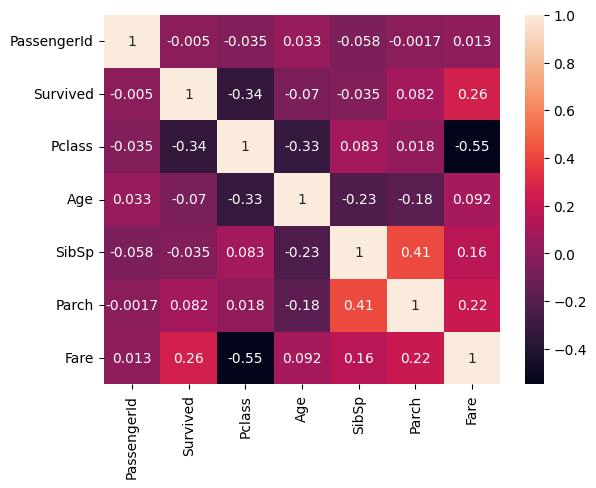

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


***Encoding Categorical Columns***

In [ ]:
le_sex=LabelEncoder()
le_embarked=LabelEncoder()
df['Sex']=le_sex.fit_transform(df['Sex'])
df['Embarked']=le_embarked.fit_transform(df['Embarked'])

***Spliting Data***

In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

***Scaling***

In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

***Modeling***

In [ ]:
def evaluate_model(model,pred):
    print(f'Accuracy Train Score : {model.score(x_train,y_train)}\n')
    print(f'Accuracy Test Score : {model.score(x_test,y_test)}\n')
    print(f'Classification Report: \n{classification_report(y_test,pred)}\n')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.show()

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr=lr.predict(x_test)

Accuracy Train Score : 0.8033707865168539

Accuracy Test Score : 0.7932960893854749

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       108
           1       0.74      0.73      0.74        71

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179




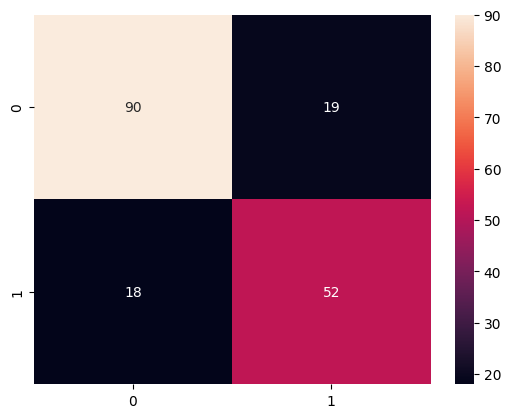

In [ ]:
evaluate_model(lr,y_pred_lr)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt.predict(x_test)

Accuracy Train Score : 0.9845505617977528

Accuracy Test Score : 0.776536312849162

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.72      0.72      0.72        71

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179




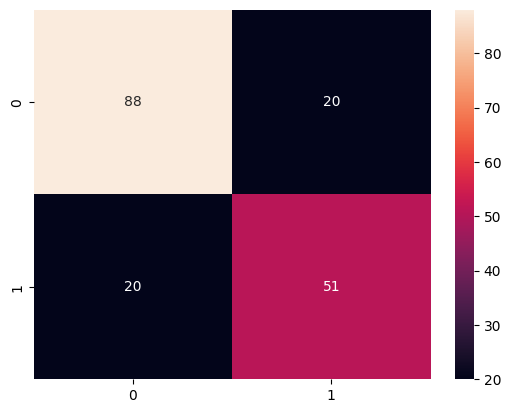

In [ ]:
evaluate_model(dt,y_pred_dt)

In [ ]:
rf=RandomForestClassifier(n_estimators=120)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=120)

In [ ]:
y_pred_rf=rf.predict(x_test)

Accuracy Train Score : 0.9845505617977528

Accuracy Test Score : 0.8491620111731844

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       108
           1       0.79      0.85      0.82        71

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179




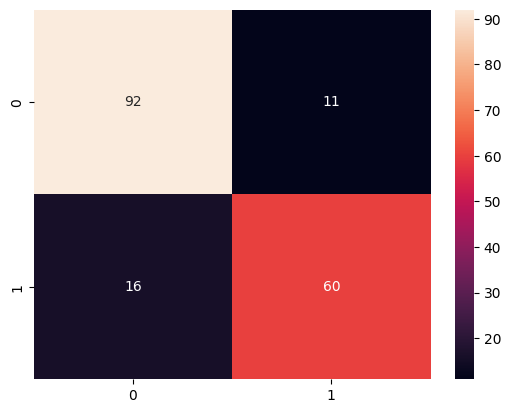

In [ ]:
evaluate_model(rf,y_pred_rf)

In [ ]:
xgboost=xgb.XGBClassifier(random_state=42)
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Accuracy Train Score : 0.9691011235955056

Accuracy Test Score : 0.8212290502793296

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       108
           1       0.77      0.79      0.78        71

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179




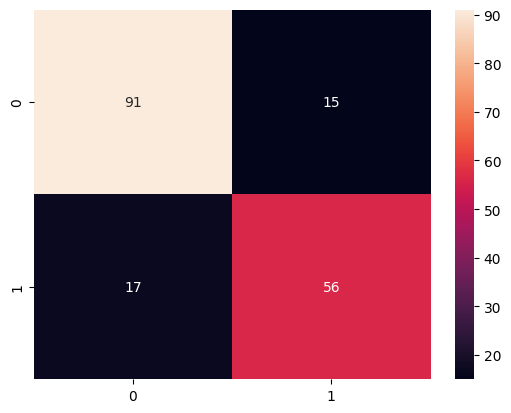

In [ ]:
y_pred_xgb=xgboost.predict(x_test)
evaluate_model(xgboost,y_pred_xgb)